# Etudes de la puissance de l'oeil : régression linéaire multiple
Nous allons étudier la puissance optique de l'oeil (Po) en fonction de la longueur axiale (L), la puissance de la cornée (Pk), la puissance du cristallin (Pc) et la profondeur de la chambre antérieure (Pa). On souhaite obtenir une relation mathématique : Po = a0 + a1L + a2Pk + a3Pc + a4Pa où les ai sont des coefficients réels à déterminer. Nous allons baser notre étude sur les données de Stenstrom.

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

path = "data_strenstrom_2.csv"
data = pd.read_csv(path)
data

,Po,Pk,Pa,Pc,La
0,-7.5520,44.8616,3.7321,16.1697,26.5122
1,-7.4818,45.6834,4.5603,17.4978,26.0129
2,-7.4724,43.5913,3.7268,17.0448,26.7564
3,-7.4068,44.4949,4.0013,15.0735,27.1939
4,-6.6532,43.2616,4.1577,18.5825,26.2218
...,...,...,...,...,...
995,5.2092,44.3390,3.0752,18.8944,20.8187
996,5.4213,41.3132,3.3241,16.9188,22.3233
997,5.2581,43.9416,3.0847,16.9164,21.4096
998,5.3102,44.2088,3.3104,16.8240,21.4202


# Etude statistique

In [62]:
data.describe()

,Po,Pk,Pa,Pc,La
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.084989,42.790494,3.675482,17.224383,23.985396
std,1.759182,1.403508,0.268955,1.373136,0.917354
min,-7.552000,37.962000,2.873000,12.707100,20.818700
25%,-0.165250,41.795325,3.486300,16.315125,23.423850
50%,0.399850,42.808050,3.670100,17.217300,23.933850
75%,0.847850,43.695350,3.851725,18.135750,24.502775
max,5.679800,47.860000,4.676300,22.665400,27.442300


In [63]:
data.columns

Index(['Po', 'Pk', 'Pa', 'Pc', 'La'], dtype='object')

Affichons les histogrammes pour chaque variable

<Axes: >

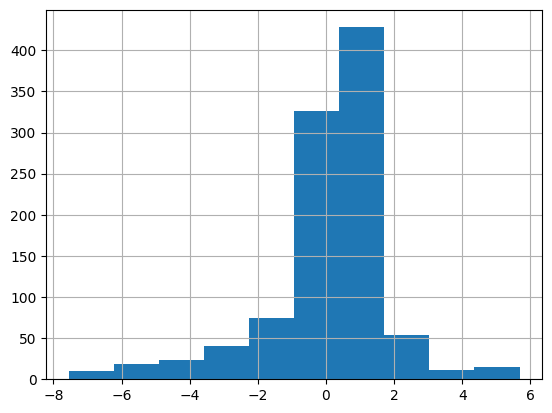

In [64]:
data["Po"].hist()

<Axes: >

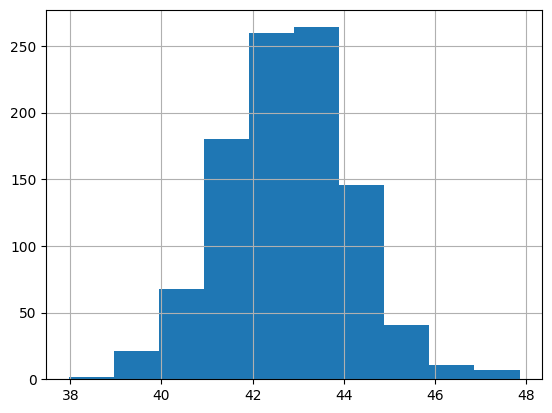

In [65]:
data["Pk"].hist()

<Axes: >

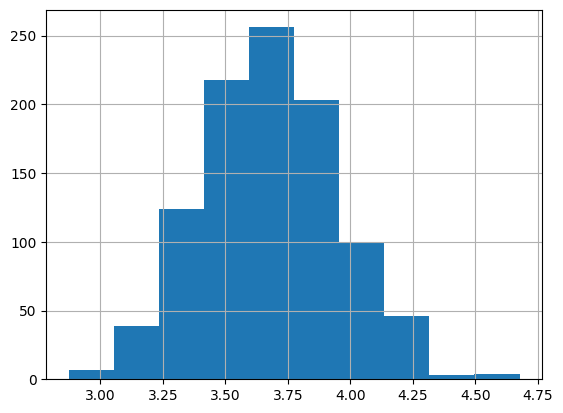

In [66]:
data["Pa"].hist()

<Axes: >

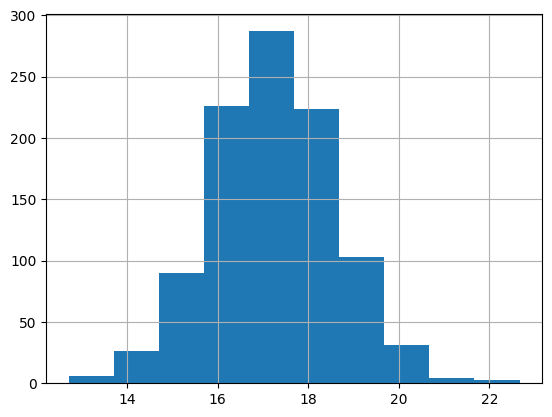

In [67]:
data["Pc"].hist()

<Axes: >

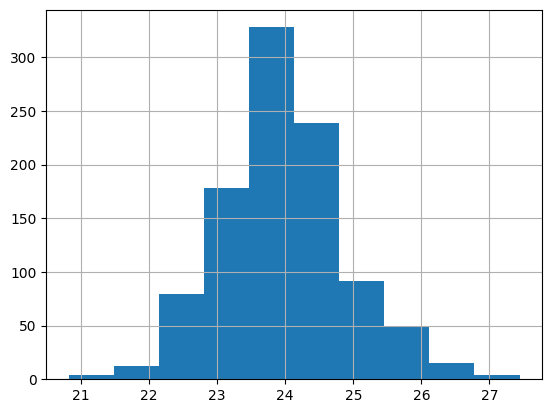

In [68]:
data["La"].hist()

On peut voir que pour toutes les variables la répartition des données prend la forme d'une Gaussienne.
Pour la régression linéaire il est très important de normaliser (éviter que les variables avec des grandes valeurs aient une plus forte importance que dans la réalité) et cette répartition est parfaite pour l'applicationd d'une normalisation.

In [69]:
def AfficherYfonctionX(X,Y,titre="",xlabel="",ylabel=""):
    plt.plot(X,Y,'.')
    plt.title(titre)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

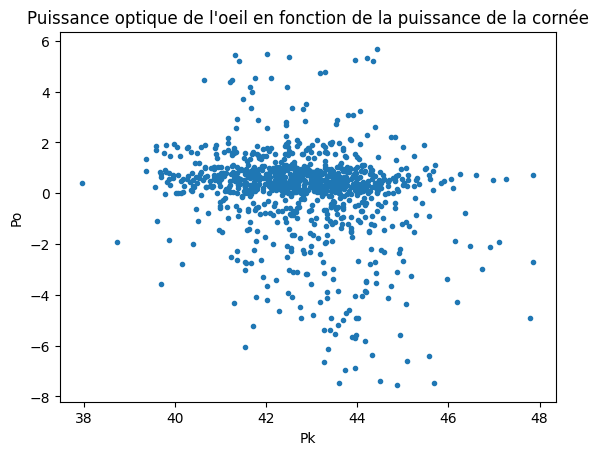

In [70]:
AfficherYfonctionX(data["Pk"],data["Po"],titre="Puissance optique de l'oeil en fonction de la puissance de la cornée",xlabel="Pk",ylabel="Po")

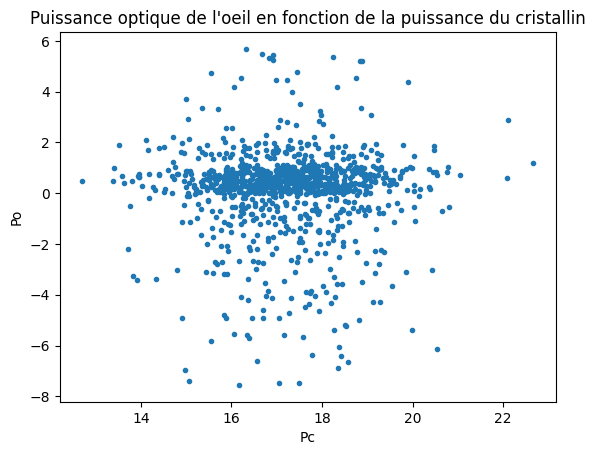

In [71]:
AfficherYfonctionX(data["Pc"],data["Po"],titre="Puissance optique de l'oeil en fonction de la puissance du cristallin",xlabel="Pc",ylabel="Po")

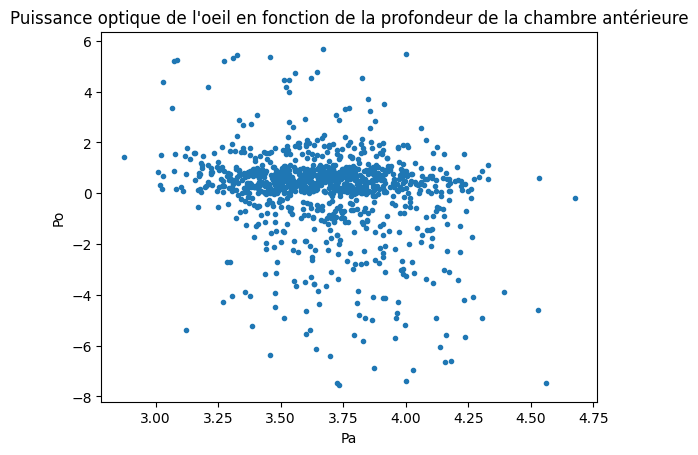

In [72]:
AfficherYfonctionX(data["Pa"],data["Po"],titre="Puissance optique de l'oeil en fonction de la profondeur de la chambre antérieure",xlabel="Pa",ylabel="Po")

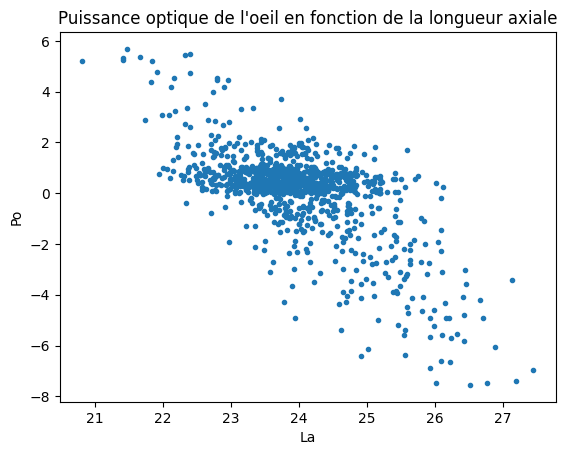

In [73]:
AfficherYfonctionX(data["La"],data["Po"],titre="Puissance optique de l'oeil en fonction de la longueur axiale",xlabel="La",ylabel="Po")

On voit assez clairement que l'on ne peut pas expliquer la puissance optique de l'oeil à partir d'une seule variable mais qu'il semble bien y avoir une sorte de relation quand même.

# Préparation des données

In [74]:
def normalisation(df):
    scaler = StandardScaler()
    donnees_normalisees = scaler.fit_transform(df)
    df_normalise = pd.DataFrame(donnees_normalisees, columns=df.columns)
    return df_normalise
data = normalisation(data)
data

,Po,Pk,Pa,Pc,La
0,-4.343389,1.476402,0.210616,-0.768468,2.755828
1,-4.303464,2.062228,3.291485,0.199218,2.211272
2,-4.298118,0.570860,0.190900,-0.130849,3.022162
3,-4.260809,1.214998,1.212028,-1.567186,3.499316
4,-3.832214,0.335831,1.793830,0.989557,2.439107
...,...,...,...,...,...
995,2.914295,1.103863,-2.233024,1.216815,-3.453718
996,3.034923,-1.053099,-1.307127,-0.222655,-1.812744
997,2.942106,0.820574,-2.197685,-0.224404,-2.809260
998,2.971737,1.011049,-1.358090,-0.291729,-2.797699


In [75]:
#Séparation des données en données d'entrainement et données de test
data_train = data.sample(frac=0.8)
data_test = data.drop(data_train.index)

data_trainY = data_train["Po"]
data_testY = data_test["Po"]

data_trainX = data_train.drop("Po",axis=1)
data_testX = data_test.drop("Po",axis=1)

data_trainX

,Pk,Pa,Pc,La
754,-1.374527,-0.645718,0.312811,0.371367
969,0.742730,0.563268,-1.572724,-0.587631
527,1.923863,-0.181468,1.511689,-2.093147
257,0.208586,0.245211,0.204537,0.250524
156,-0.860343,0.077441,0.812501,0.816020
...,...,...,...,...
165,0.929427,0.295431,-0.154602,-0.127600
880,-2.449301,-0.861476,-0.744788,1.217483
636,-0.075559,-0.206763,-0.007420,-0.146686
915,-0.290200,-0.170308,-0.056893,-0.277454


# Modélisation

In [86]:
reg = LinearRegression()
reg.fit(data_trainX,data_trainY)
predY=reg.predict(data_testX)
erreur = sk.metrics.mean_squared_error(data_testY,predY)
(reg.intercept_,reg.coef_, erreur)

(-0.00010873952634210711,
 array([-0.79941686,  0.17815286, -0.6043648 , -1.31854308]),
 0.003489566293656533)

La formule finale est la suivante : 
Po = -0.0001 + -1.3185La + -0.7994Pk + -0.6044Pc + 0.1781Pa pour obtenir Po en normaliser. Pour la formule exacte il faut appliquer la normalisaiton inverse. Cependant on peu repérer quelles sont les variables les plus importantes : la longueur axiale, la puissance optique de la cornée pui la puissance optique du cristallin et enfin la profondeur de la chambre antérieure.